# EV Market Data Analysis

In [1]:
# Importing Libraries

# type:ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from scipy.stats import entropy
from scipy.stats import linregress

In [2]:
#Data
data = pd.read_csv(r"ev_cat_01-24.csv")

In [3]:
data.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


Immediately there are 2 problems:
- First row is 0s.
- Date column is not correctly identified as date datatype.

In [4]:
#Dropping 0s
data.drop(index=0,inplace=True)
data.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
5,01/01/05,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


In [5]:
# Checking Null Values
data.isnull().sum()

Date                               0
FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0
TWO WHEELER(T)                     0
dtype: int64

This suggests data quality is good!

In [6]:
# Checking Duplicate records
data.duplicated().sum()

0

In [7]:
# Converting Date to desired datatype
data["Date"] = pd.to_datetime(data["Date"], format= "%d/%m/%y")
data.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
1,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,2002-01-01,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,2003-01-01,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,2004-01-01,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
5,2005-01-01,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


In [8]:
# Setting Index to Date
d = data.set_index(data["Date"])

In [9]:
#Sorting data from oldest date to latest
data_sorted = d.sort_index()
data_sorted.drop(columns="Date",inplace=True)

In [10]:
data_sorted.describe()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.342756,2.169611,0.515901,28.731449,44.964664,637.208481,80.590106,0.109541,2.742049,0.173145,26.816254,5.293286,0.445230,6829.268551,8158.611307,47.558304
std,1.225834,12.068930,1.025695,79.088549,132.271583,1673.564172,237.983315,0.410864,10.360209,1.235578,67.653593,11.189004,2.073046,13720.345383,21546.263739,130.132199
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.500000,28.500000,86.500000,24.000000,0.000000,0.000000,0.000000,18.500000,3.000000,0.000000,7634.500000,1433.500000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


To Perform PCA, We first need to Standardize the data.

In [11]:
#Standardizing
d = (data_sorted - data_sorted.mean()) / data_sorted.std()
d.describe()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,283.000000,2.830000e+02,283.000000,2.830000e+02,283.000000,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,283.000000,2.830000e+02,2.830000e+02
mean,0.000000,1.255376e-17,0.000000,-2.510752e-17,0.000000,-2.510752e-17,5.021503e-17,-6.276879e-18,5.021503e-17,3.138440e-18,-5.021503e-17,-5.021503e-17,1.255376e-17,0.000000,2.510752e-17,7.532255e-17
std,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-0.279611,-1.797683e-01,-0.502977,-3.632820e-01,-0.339942,-3.795543e-01,-3.386376e-01,-2.666103e-01,-2.646712e-01,-1.401327e-01,-3.963759e-01,-4.730793e-01,-2.147707e-01,-0.497748,-3.783770e-01,-3.654615e-01
25%,-0.279611,-1.797683e-01,-0.502977,-3.632820e-01,-0.309701,-3.646161e-01,-3.344357e-01,-2.666103e-01,-2.646712e-01,-1.401327e-01,-3.963759e-01,-4.730793e-01,-2.147707e-01,-0.497602,-3.741071e-01,-3.654615e-01
50%,-0.279611,-1.797683e-01,-0.502977,-3.632820e-01,-0.279460,-3.520681e-01,-3.302337e-01,-2.666103e-01,-2.646712e-01,-1.401327e-01,-3.815947e-01,-4.730793e-01,-2.147707e-01,-0.497456,-3.693267e-01,-3.654615e-01
75%,-0.279611,-9.691094e-02,0.471971,-3.443159e-01,-0.124476,-3.290633e-01,-2.377902e-01,-2.666103e-01,-2.646712e-01,-1.401327e-01,-1.229241e-01,-2.049589e-01,-2.147707e-01,0.058689,-3.121242e-01,-3.577770e-01
max,7.878101,1.498313e+01,5.346713,6.502440e+00,12.096592,4.165835e+00,7.170292e+00,9.468967e+00,8.036319e+00,1.604663e+01,9.551359e+00,5.783063e+00,1.136239e+01,3.920363,5.985000e+00,6.266256e+00


In [12]:
d.columns.tolist()

['FOUR WHEELER (INVALID CARRIAGE)',
 'HEAVY GOODS VEHICLE',
 'HEAVY MOTOR VEHICLE',
 'HEAVY PASSENGER VEHICLE',
 'LIGHT GOODS VEHICLE',
 'LIGHT MOTOR VEHICLE',
 'LIGHT PASSENGER VEHICLE',
 'MEDIUM GOODS VEHICLE',
 'MEDIUM PASSENGER VEHICLE',
 'MEDIUM MOTOR VEHICLE',
 'OTHER THAN MENTIONED ABOVE',
 'THREE WHEELER(NT)',
 'TWO WHEELER (INVALID CARRIAGE)',
 'THREE WHEELER(T)',
 'TWO WHEELER(NT)',
 'TWO WHEELER(T)']

In [13]:
d.shape

(283, 16)

In [14]:
d.head()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
Date,,,,,,,,,,,,,,,,
2001-01-01,-0.279611,-0.096911,-0.502977,-0.363282,-0.271900,-0.371786,-0.334436,-0.266610,-0.264671,-0.140133,-0.366814,-0.473079,-0.214771,-0.497602,-0.375778,-0.365461
2001-02-01,-0.279611,-0.179768,-0.502977,-0.363282,-0.287021,-0.364019,-0.338638,-0.266610,-0.264671,-0.140133,-0.396376,-0.473079,-0.214771,-0.497602,-0.375639,-0.365461
2001-03-01,-0.279611,-0.179768,1.446920,-0.363282,-0.294581,-0.365214,-0.338638,2.167284,-0.264671,-0.140133,-0.366814,-0.383706,-0.214771,-0.497675,-0.375175,-0.365461
2001-04-01,-0.279611,-0.179768,-0.502977,-0.363282,-0.249220,-0.368799,-0.330234,-0.266610,-0.264671,-0.140133,-0.396376,-0.473079,-0.214771,-0.497675,-0.375917,-0.365461
2001-05-01,-0.279611,-0.179768,-0.502977,-0.363282,-0.234099,-0.370591,-0.338638,-0.266610,-0.264671,-0.140133,-0.396376,-0.473079,-0.214771,-0.497602,-0.375453,-0.365461


In [15]:
#Defining PCA
pca = PCA()

data_pca = pca.fit_transform(d)

Std = np.sqrt(pca.explained_variance_)
Pv = pca.explained_variance_ratio_

index = [f"PC{i+1}" for i in range(len(Std))]

output = pd.DataFrame({"Standard Deviation": Std,"Proportion of Variance": Pv,"Cumulative Proportion": Pv.cumsum()},index = index)

output = output.transpose().round(3)

output

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Standard Deviation,2.676,1.283,1.024,0.997,0.983,0.959,0.925,0.856,0.743,0.666,0.525,0.383,0.324,0.304,0.217,0.133
Proportion of Variance,0.447,0.103,0.066,0.062,0.060,0.057,0.053,0.046,0.034,0.028,0.017,0.009,0.007,0.006,0.003,0.001
Cumulative Proportion,0.447,0.550,0.616,0.678,0.738,0.796,0.849,0.895,0.929,0.957,0.974,0.984,0.990,0.996,0.999,1.000


In [16]:
data_p = pca.fit(d)

rotation_df = pd.DataFrame(data_p.components_.T, index = d.columns, columns = index)
rotation_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
FOUR WHEELER (INVALID CARRIAGE),0.32,-0.25,-0.04,-0.10,-0.06,0.02,0.04,-0.15,0.03,-0.05,-0.38,0.58,-0.05,-0.46,-0.29,-0.09
HEAVY GOODS VEHICLE,0.19,-0.31,0.01,0.14,0.28,-0.21,-0.27,0.69,0.18,0.14,-0.01,-0.20,0.13,-0.23,-0.08,-0.08
HEAVY MOTOR VEHICLE,-0.06,-0.21,0.58,0.24,0.35,-0.29,0.57,-0.14,-0.00,0.06,0.01,0.01,-0.00,0.03,-0.03,-0.01
HEAVY PASSENGER VEHICLE,0.34,0.02,0.03,-0.08,-0.17,0.03,0.17,-0.11,-0.09,-0.22,0.00,-0.28,0.81,-0.05,-0.11,0.03
LIGHT GOODS VEHICLE,0.24,-0.23,0.07,-0.21,-0.44,-0.06,0.11,-0.09,0.04,0.75,0.24,-0.10,-0.07,0.02,0.01,0.02
LIGHT MOTOR VEHICLE,0.35,-0.10,0.00,0.03,-0.03,-0.00,0.05,-0.02,-0.12,-0.26,0.04,-0.30,-0.39,-0.15,-0.04,0.71
LIGHT PASSENGER VEHICLE,0.34,-0.09,0.08,-0.07,-0.00,-0.21,-0.16,0.12,-0.06,-0.02,-0.34,0.27,0.05,0.75,0.11,0.14
MEDIUM GOODS VEHICLE,-0.04,-0.15,0.67,-0.19,-0.03,0.63,-0.29,0.08,0.02,-0.07,0.00,-0.01,0.00,0.01,0.00,0.00
MEDIUM PASSENGER VEHICLE,0.16,0.14,-0.19,-0.45,0.38,0.32,0.46,0.35,-0.22,0.08,0.18,0.18,-0.01,0.05,0.07,0.02
MEDIUM MOTOR VEHICLE,0.08,-0.24,-0.27,0.67,-0.07,0.54,0.23,0.05,0.05,0.12,-0.09,0.03,0.04,0.16,0.07,0.02


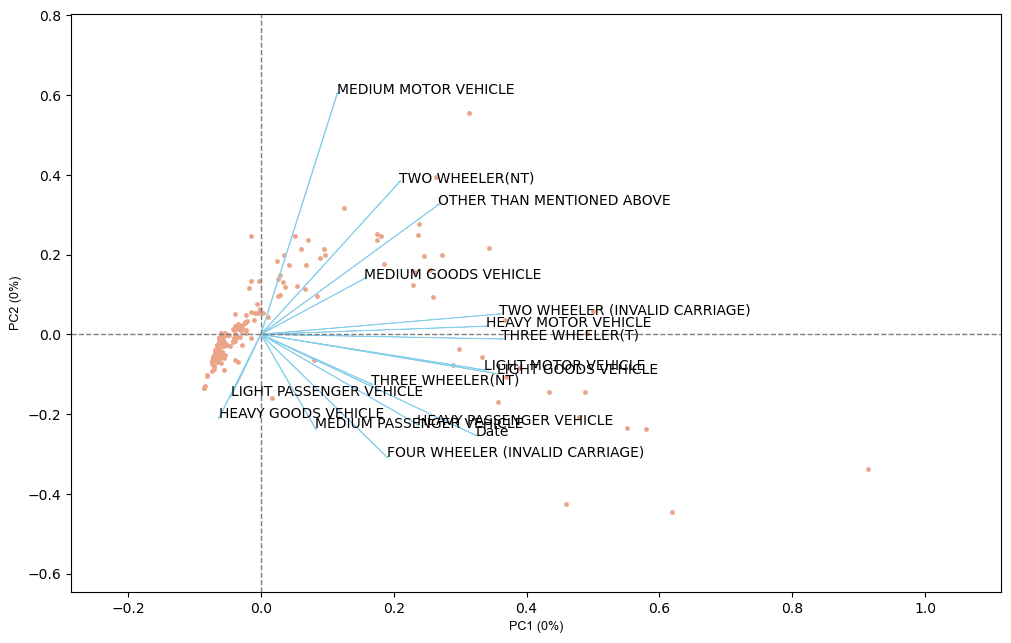

In [17]:
#Plotting Principle Component 1 and 2
load = pca.components_
cluster.biplot(cscore=data_pca, loadings = load, labels = data.columns, var1=0, var2=0, show = True, dim=(12,7.5))

c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

<Axes: title={'center': 'Segmentation Results'}, xlabel='Number of Segments', ylabel='Sum of within cluster distances'>

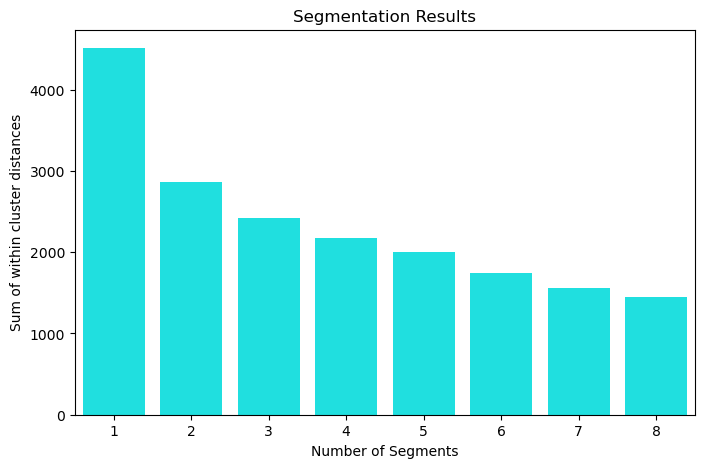

In [18]:
# KMeans Algorithm
segments = range(1,9)

data_km28 = {}
within_cluster_distances = []

for k in segments:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
    kmeans.fit(d)
    within_cluster_distances.append(kmeans.inertia_)
    data_km28[str(k)] = kmeans

plt.figure(figsize=(8,5))
plt.xlabel("Number of Segments")
plt.ylabel("Sum of within cluster distances")
plt.title("Segmentation Results")
sns.barplot(x=segments, y= within_cluster_distances, color="cyan")

In [19]:
# Likelihood Test
k_values = range(2, 15)
data_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(d.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = d.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    data_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
DATA_m28 = pd.DataFrame(data_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(DATA_m28)


    iter  converged   k  k0       logLik          AIC          BIC  \
0      4       True   2   2 -2867.458882  5738.917765  5746.208658   
1      4       True   3   3 -2422.969666  4851.939332  4862.875672   
2      4       True   4   4 -2172.435696  4352.871392  4367.453180   
3      9       True   5   5 -2003.718723  4017.437445  4035.664680   
4      9       True   6   6 -1783.858900  3579.717799  3601.590481   
5      8       True   7   7 -1605.787453  3225.574907  3251.093035   
6      6       True   8   8 -1540.291628  3096.583255  3125.746831   
7      7       True   9   9 -1410.594848  2839.189697  2871.998719   
8      8       True  10  10 -1232.250013  2484.500026  2520.954495   
9      8       True  11  11 -1060.973755  2143.947510  2184.047426   
10     5       True  12  12  -993.486084  2010.972168  2054.717530   
11     4       True  13  13  -975.980295  1977.960589  2025.351399   
12     4       True  14  14  -928.075029  1884.150058  1935.186314   

            ICL  
0

c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

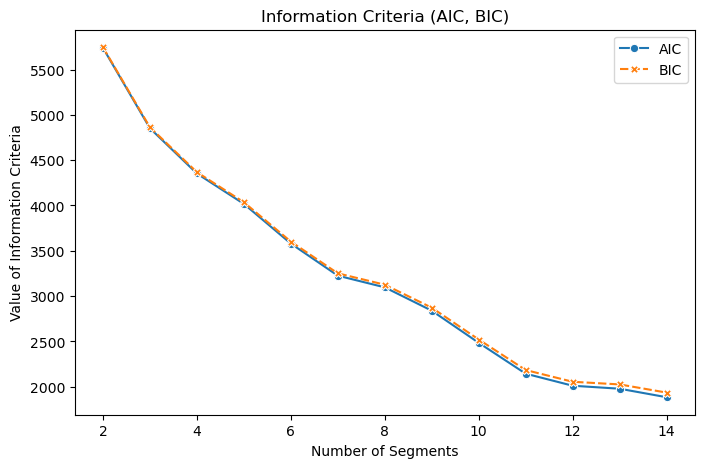

In [20]:
# Information Criterion
plt.figure(figsize=(8,5))
DATA_m28.set_index(DATA_m28["k"], inplace=True)

sns.lineplot(DATA_m28[["AIC", "BIC"]], markers=True)

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC)')

plt.show()


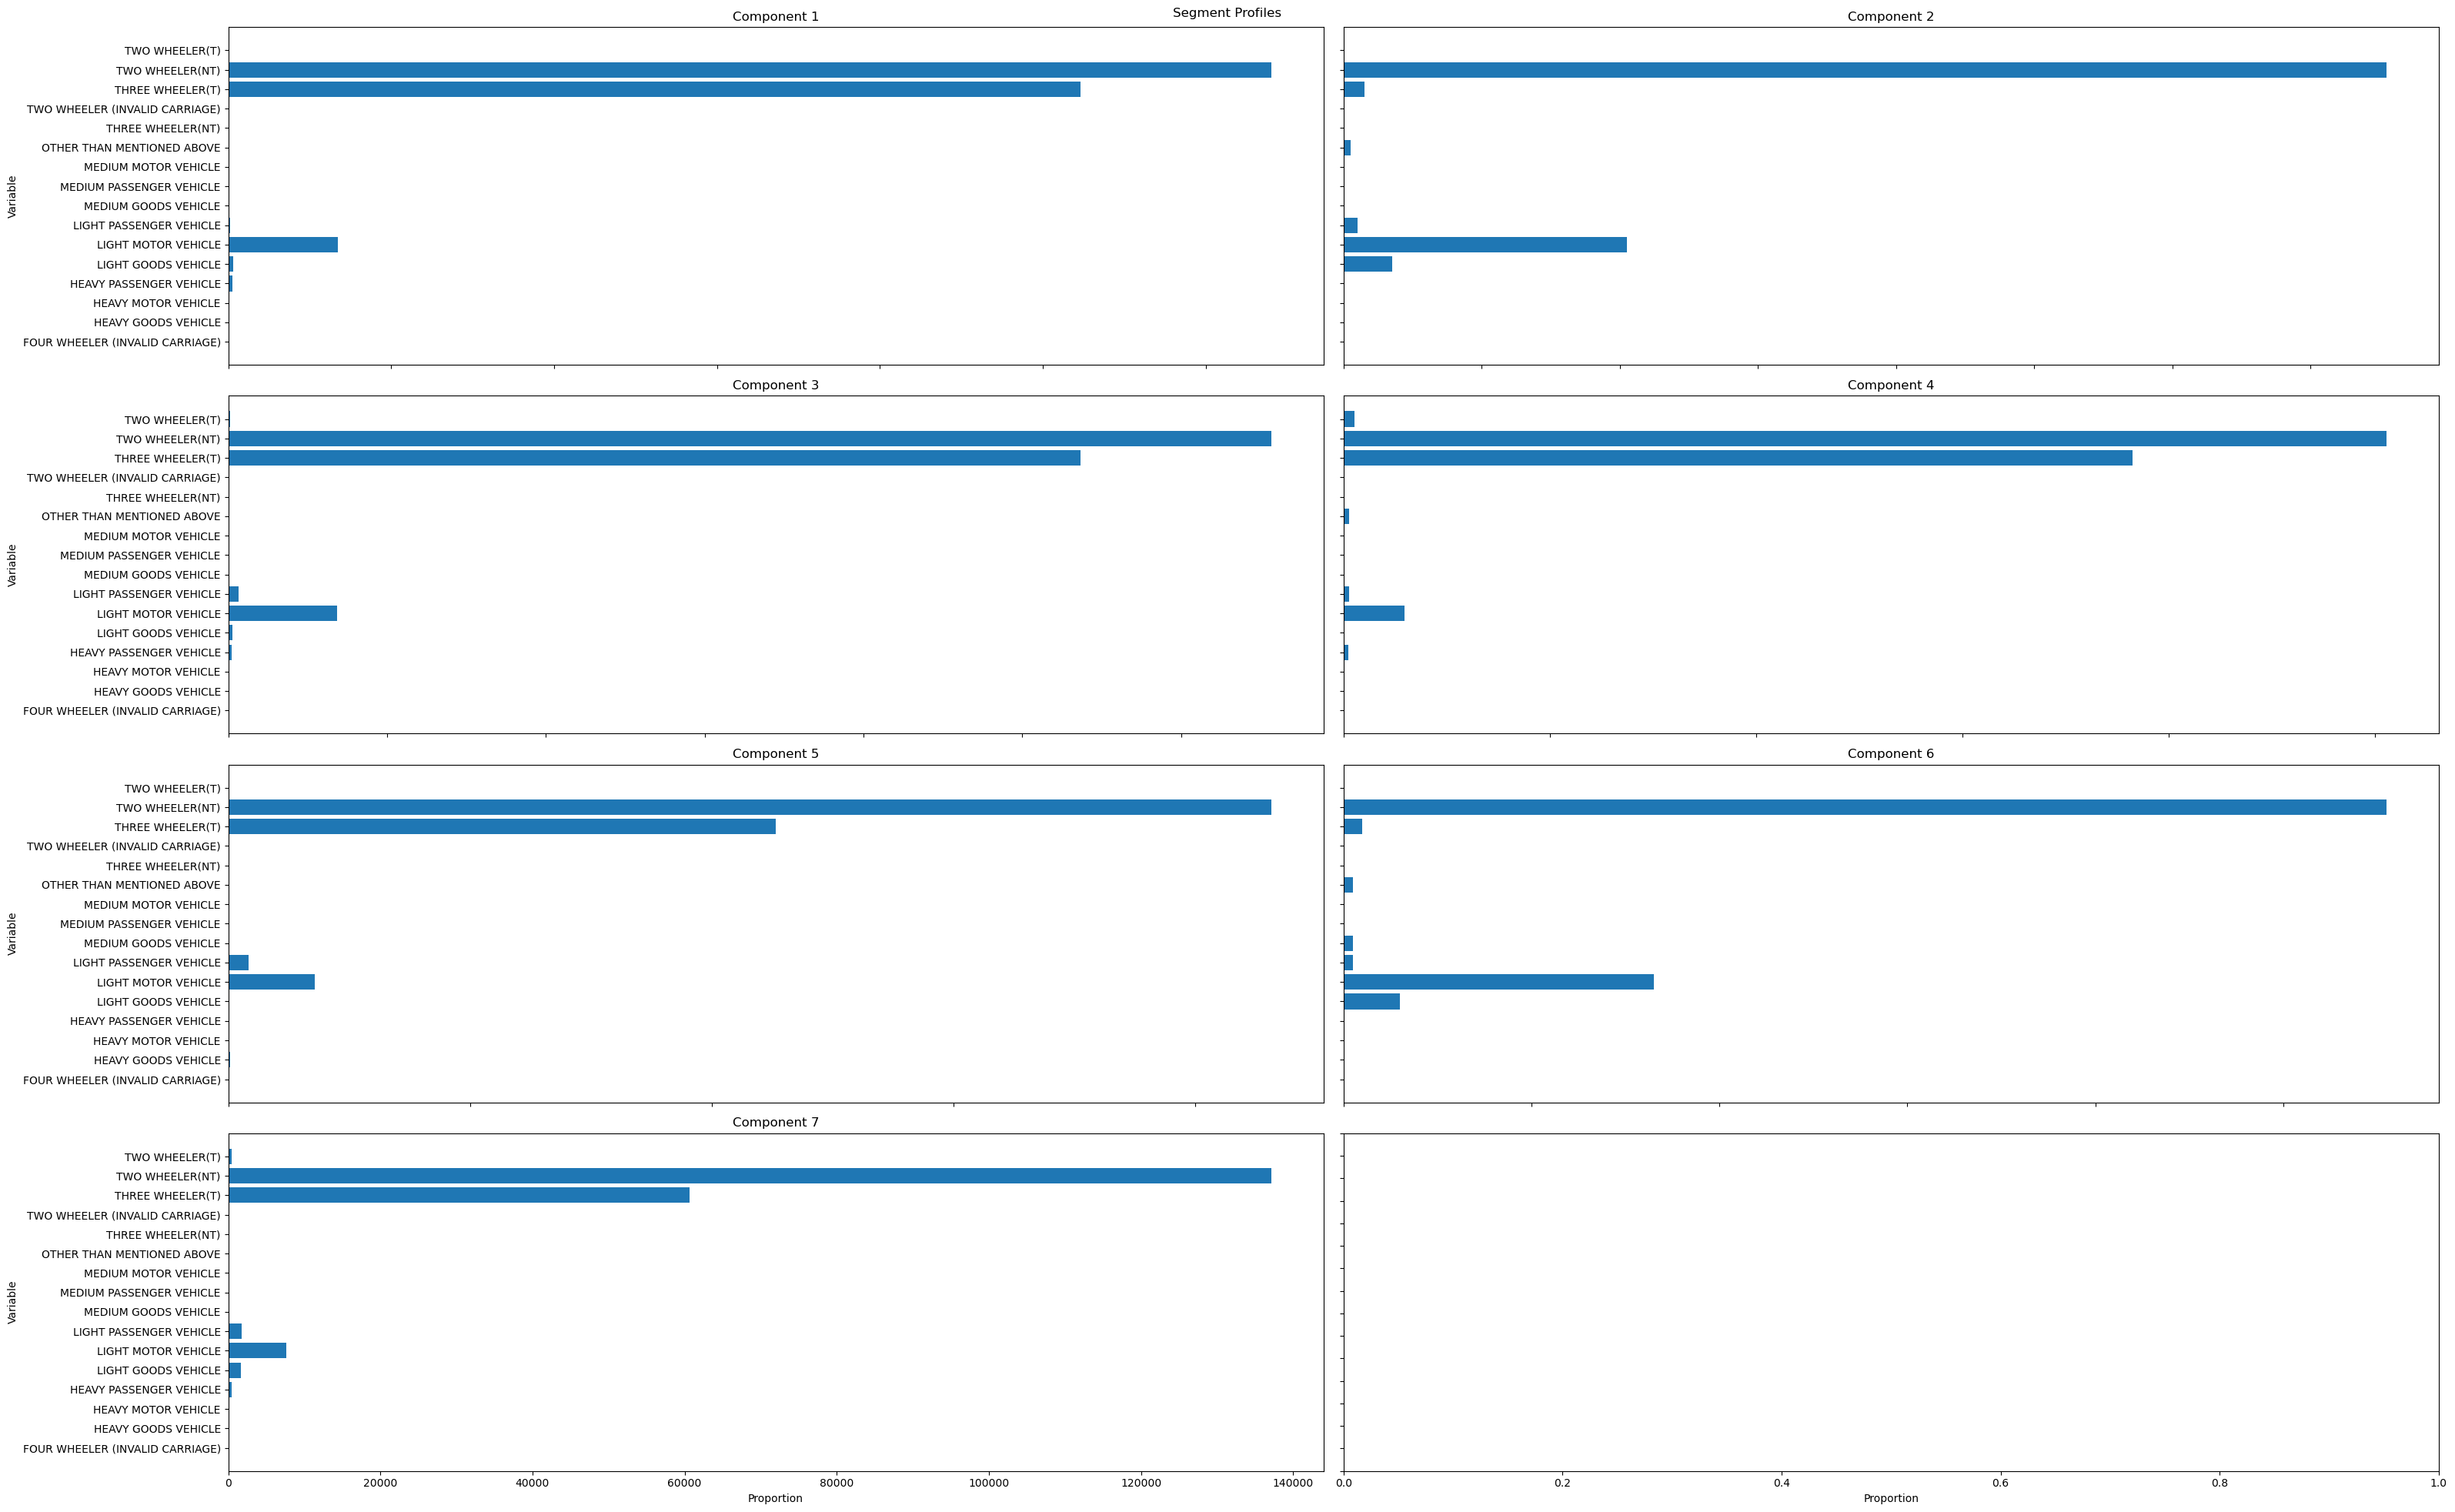

In [21]:
#Plotting Segment wise median
kmeans = data_km28['7']

labels = kmeans.labels_

MD_mean = data_sorted.groupby(labels).median()

fig, axs = plt.subplots(4, 2, figsize=(32, 20))

axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')

axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')

axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')

axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

axs[2, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[4])
axs[2, 0].set_title('Component 5')

axs[2, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[5])
axs[2, 1].set_title('Component 6')

axs[3, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[6])
axs[3, 0].set_title('Component 7')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(d.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

In [22]:
# Extracting Segment proportions
label_prop = pd.Series(kmeans.labels_)

(label_prop.value_counts() / label_prop.count())

1    0.745583
3    0.106007
5    0.088339
2    0.049470
4    0.003534
6    0.003534
0    0.003534
Name: count, dtype: float64

<Axes: xlabel='labels', ylabel='TWO WHEELER(NT)'>

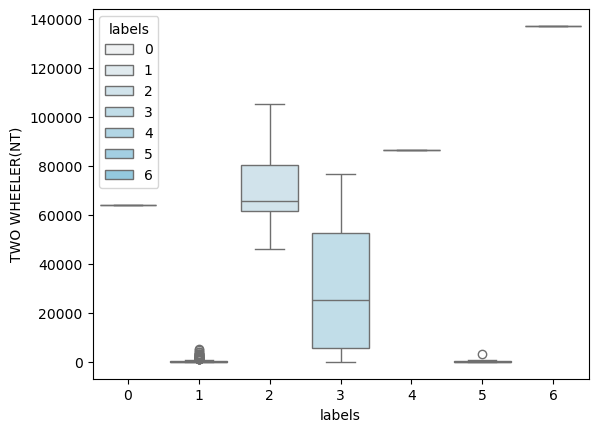

In [23]:
#Visualising and Detailing Segments
data = data_sorted.copy()
data["labels"] = labels
sns.boxplot(data,y="TWO WHEELER(NT)", x = "labels", palette="light:skyblue", hue="labels", linewidth=1)

<Axes: xlabel='labels', ylabel='THREE WHEELER(T)'>

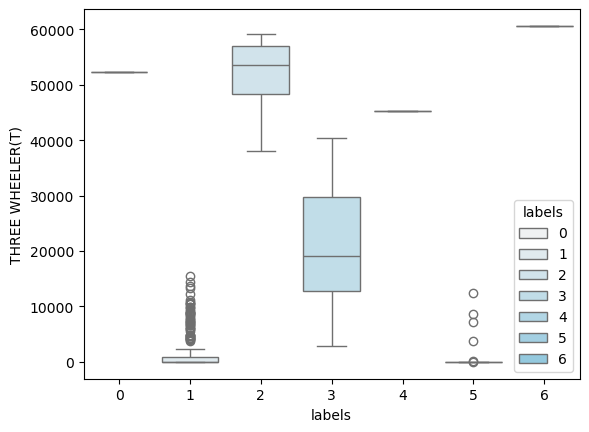

In [24]:
#Describing 3 wheeler segment
sns.boxplot(data,y="THREE WHEELER(T)", x = "labels", palette="light:skyblue", hue="labels", linewidth=1)

In [25]:
two_wheeler = data.groupby("labels")["TWO WHEELER(NT)"].median().to_frame()
three_wheeler = data.groupby("labels")["THREE WHEELER(T)"].median().to_frame()

segment = two_wheeler.merge(three_wheeler, on="labels", how="left")
segment

,TWO WHEELER(NT),THREE WHEELER(T)
labels,,
0,64025.0,52296.0
1,151.0,3.0
2,65684.5,53654.5
3,25274.0,19119.0
4,86325.0,45305.0
5,111.0,2.0
6,137113.0,60618.0


<Axes: xlabel='TWO WHEELER(NT)', ylabel='THREE WHEELER(T)'>

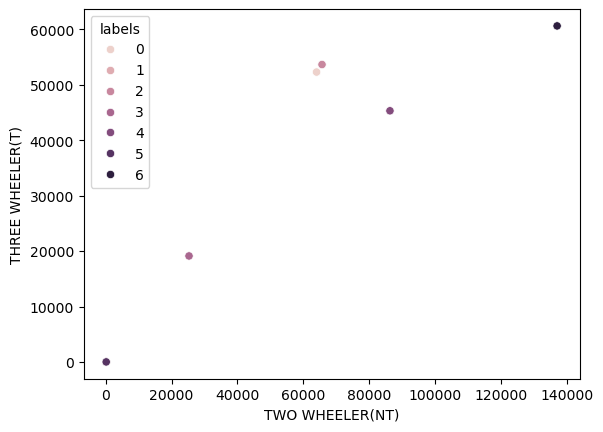

In [26]:
#Extracting most viable Vehicle type
sns.scatterplot(segment, x="TWO WHEELER(NT)", y="THREE WHEELER(T)", hue="labels")

# Manufacturing Location

In [27]:
data1 = pd.read_csv(r"OperationalPC.csv")

In [28]:
data1.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


Text(0.5, 1.0, 'Top 5 States with highest concenration of PCS')

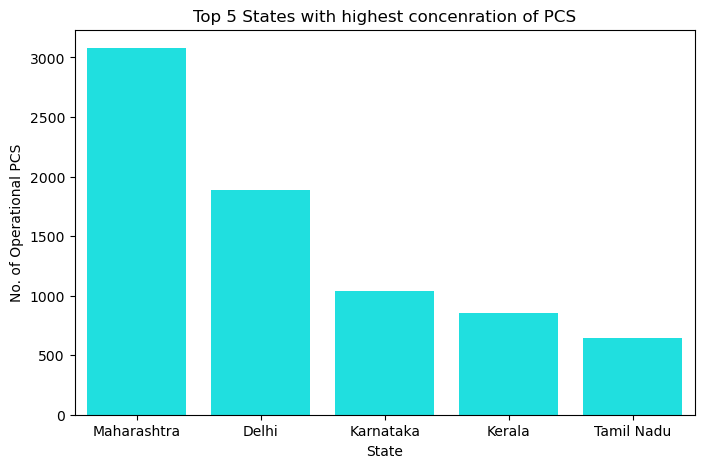

In [29]:
#Plotting top 5 states with highest concentration of PCS
data1 = data1.sort_values(by="No. of Operational PCS", ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data1[:5], x="State", y='No. of Operational PCS', color="cyan")
plt.title("Top 5 States with highest concenration of PCS")

In [30]:
data2 = pd.read_csv(r"EV Maker by Place.csv")

Text(0.5, 1.0, 'Top 5 states with highest number of EV manufacturers')

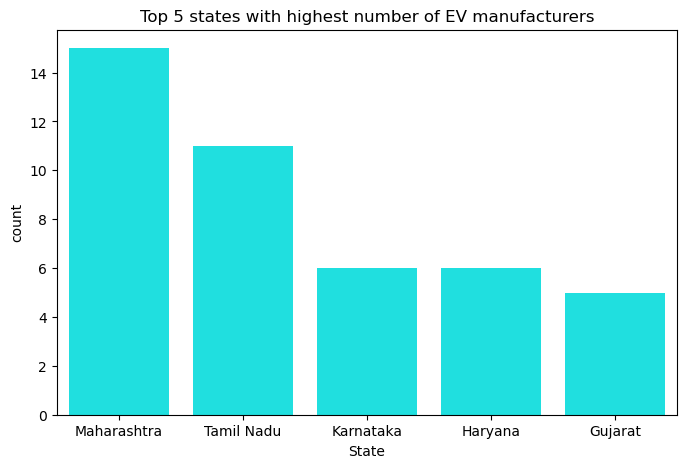

In [31]:
#Plotting top 5 states with highest number of EV manufacturers
state_manu_count = pd.DataFrame(data2["State"].value_counts())

plt.figure(figsize=(8,5))
sns.barplot(state_manu_count[:5], x = "State", y = "count", color = "cyan")
plt.title("Top 5 states with highest number of EV manufacturers")

In [32]:
data1.head()

,State,No. of Operational PCS
19,Maharashtra,3079
8,Delhi,1886
15,Karnataka,1041
16,Kerala,852
28,Tamil Nadu,643


In [33]:
state_manu_count.head()

,count
State,
Maharashtra,15
Tamil Nadu,11
Karnataka,6
Haryana,6
Gujarat,5


In [34]:
data1.set_index(data1["State"], inplace=True)
data1.drop("State", axis = 1, inplace= True)

In [35]:
data1.head()

,No. of Operational PCS
State,
Maharashtra,3079
Delhi,1886
Karnataka,1041
Kerala,852
Tamil Nadu,643


In [36]:
# Merging Companies and number of PCS present state-wise
merged_data = state_manu_count.merge(data1,how="left", left_index=True, right_index=True)
merged_data.columns = ["No. of Companies", "No. of Operational PCS"]

<Axes: xlabel='No. of Companies', ylabel='No. of Operational PCS'>

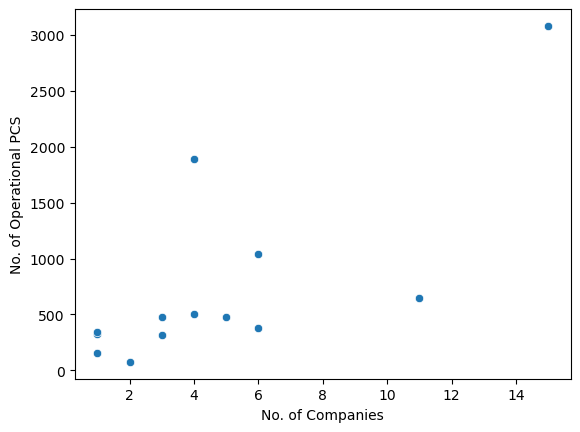

In [37]:
#Plotting scatterplot of number of companies present v/s no. of operational PCS
sns.scatterplot(merged_data,x="No. of Companies",y="No. of Operational PCS")

In [38]:
#Dividing the states into different segments based on the aforementioned 2 criterions
kmeans = KMeans(4, n_init=10, random_state=1234)

kmeans.fit((merged_data - merged_data.mean())/merged_data.std())
merged_data["clusters"] = kmeans.labels_

c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'State wise comparison of Companies and PCS present')

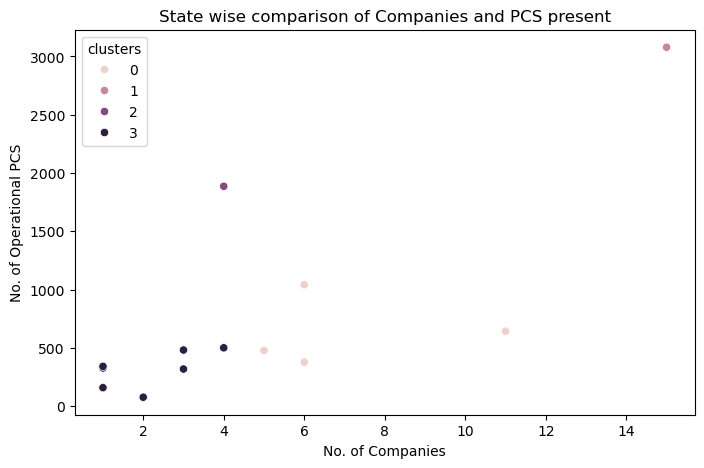

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(merged_data,x="No. of Companies",y="No. of Operational PCS", hue="clusters")
plt.title("State wise comparison of Companies and PCS present")

In [40]:
merged_data

,No. of Companies,No. of Operational PCS,clusters
State,,,
Maharashtra,15,3079,1
Tamil Nadu,11,643,0
Karnataka,6,1041,0
Haryana,6,377,0
Gujarat,5,476,0
Delhi,4,1886,2
Rajasthan,4,500,3
Telangana,3,481,3
West Bengal,3,318,3


# Sales Analysis for Pricing

In [41]:
data1 = pd.read_csv(r"ev_sales_by_makers_and_cat_15-24.csv")

In [42]:
#Data
data1.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [43]:
#Extracting total sales of 2W and 3W required for our analysis
sales = data1.groupby("Cat").sum()
sales

,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cat,,,,,,,,,,,
2W,3GB TECHNOLOGY PVT LTDA-1 SUREJA INDUSTRIESABZ...,1439,1444,1525,17075,30376,29123,156324,631393,860398,550351
3W,"""VOLVO GROUP INDIA PVT LTD""3EV INDUSTRIES PVT ...",5415,46905,83350,110179,133496,90386,158258,350546,583712,372016
LMV,3S INDUSTRIES PRIVATE LIMITEDA R T WELDING WOR...,892,896,2140,2497,1784,4226,14018,38569,84829,56537
MMV,ALL TERRAIN CRANEDIVYA INDUSTRIESKARUMALAIAN A...,6,4,4,12,130,35,254,25,295,39


In [44]:
two_wheels = pd.DataFrame(sales.iloc[0])
three_wheels = pd.DataFrame(sales.iloc[1])

In [45]:
two_wheels

,2W
Maker,3GB TECHNOLOGY PVT LTDA-1 SUREJA INDUSTRIESABZ...
2015,1439
2016,1444
2017,1525
2018,17075
2019,30376
2020,29123
2021,156324
2022,631393
2023,860398


In [46]:
three_wheels

,3W
Maker,"""VOLVO GROUP INDIA PVT LTD""3EV INDUSTRIES PVT ..."
2015,5415
2016,46905
2017,83350
2018,110179
2019,133496
2020,90386
2021,158258
2022,350546
2023,583712


In [47]:
#Dropping unnecessary records
two_wheels = two_wheels.drop("Maker")
three_wheels = three_wheels.drop("Maker")

In [48]:
#Extracting sales figures for Linear Regression
years = two_wheels.index.astype(int)
two_wheels = np.array(two_wheels["2W"].astype(int))
three_wheels = np.array(three_wheels["3W"].astype(int))

Text(0.5, 1.0, 'Logarithm of Sales v/s year for 2W Vehicles')

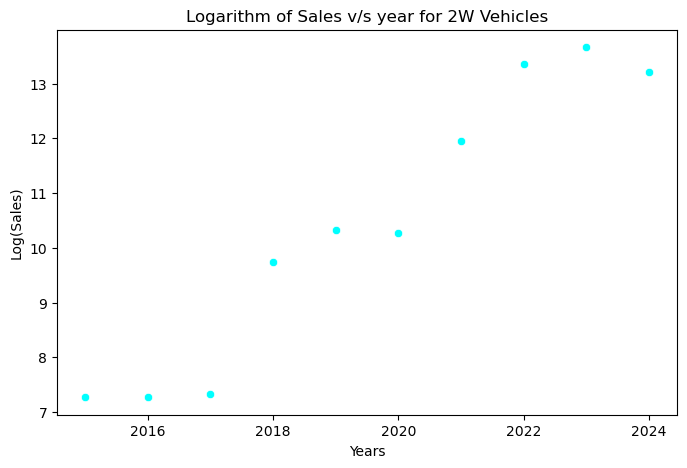

In [49]:
# Plotting sales v/s years
plt.figure(figsize=(8,5))
sns.scatterplot(x=years, y=np.log(two_wheels), color="cyan")
plt.xlabel("Years")
plt.ylabel("Log(Sales)")
plt.title("Logarithm of Sales v/s year for 2W Vehicles")

In [50]:
#Dropping Year 2015 to remove model biasedness
years = years[1:]
two_wheels = two_wheels[1:]
three_wheels = three_wheels[1:]

Text(0.5, 1.0, 'Logarithm of Sales v/s year for 3W Vehicles')

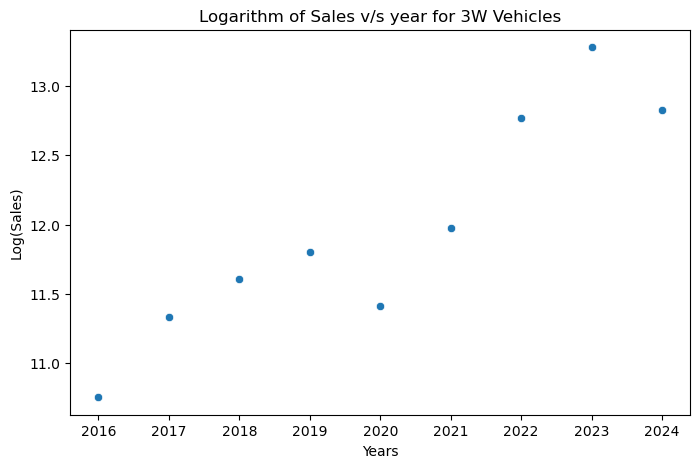

In [51]:
#Plotting sales for 3W
plt.figure(figsize=(8,5))
sns.scatterplot(x=years, y=np.log(three_wheels))
plt.xlabel("Years")
plt.ylabel("Log(Sales)")
plt.title("Logarithm of Sales v/s year for 3W Vehicles")

In [52]:
model1 = linregress(range(9), np.log(two_wheels))
model2 = linregress(range(9), np.log(three_wheels))

In [53]:
#Printing results
print("----------2W-----------")
print(f"Intercept = {max(model1.intercept.round(4),0)}")
print(f"Slope     = {model1.slope.round(4)}")
print("----------3W-----------")
print(f"Intercept = {max(model1.intercept.round(4),0)}")
print(f"Slope     = {model2.slope.round(4)}")

----------2W-----------
Intercept = 7.3519
Slope     = 0.8606
----------3W-----------
Intercept = 7.3519
Slope     = 0.2768


Text(0.5, 1.0, 'Logarithm of Sales v/s year for 2W Vehicles')

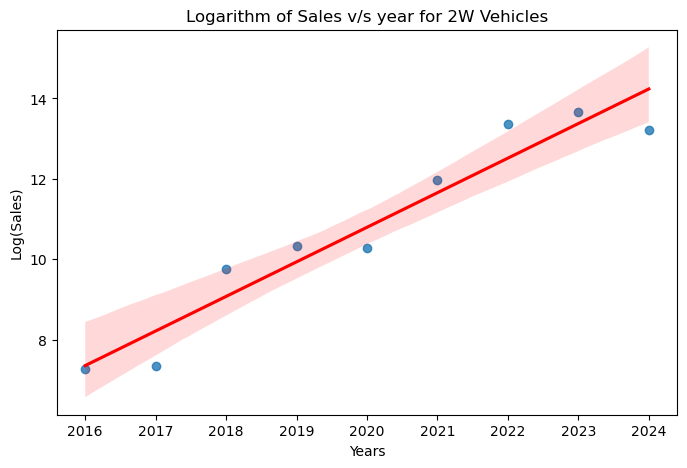

In [54]:
#Fitted sales
plt.figure(figsize=(8,5))
sns.regplot(x=years,y=np.log(two_wheels), line_kws={"color": "r"})
plt.xlabel("Years")
plt.ylabel("Log(Sales)")
plt.title("Logarithm of Sales v/s year for 2W Vehicles")

Text(0.5, 1.0, 'Logarithm of Sales v/s year for 3W Vehicles')

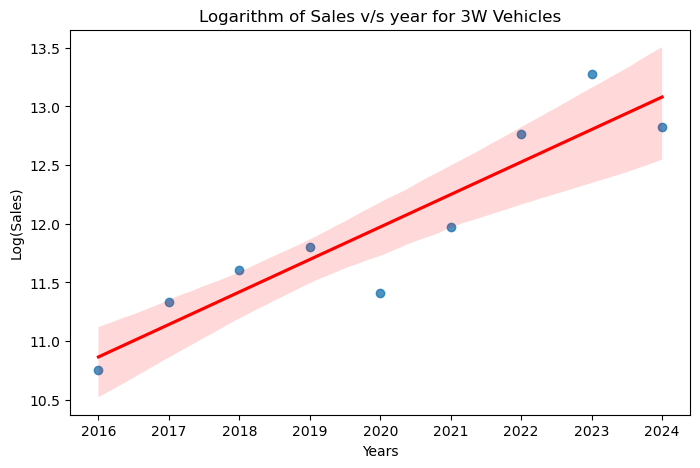

In [55]:
#Fitted sales
plt.figure(figsize=(8,5))
sns.regplot(x=years,y=np.log(three_wheels), line_kws={"color": "r"})
plt.xlabel("Years")
plt.ylabel("Log(Sales)")
plt.title("Logarithm of Sales v/s year for 3W Vehicles")

In [56]:
def model_2W(year):
    return(np.exp(model1.intercept+model1.slope*(year-2016)))

def model_3W(year):
    return(np.exp(model2.intercept+model2.slope*(year-2016)))


In [57]:
pred_sales = pd.DataFrame({"Years": range(2016,2028)})

In [58]:
pred_sales

,Years
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


In [59]:
pred_sales["sales_2W"] = model_2W(pred_sales["Years"])
pred_sales["sales_3W"] = model_3W(pred_sales["Years"])

In [60]:
#Projected Sales
pred_sales.astype(int)

,Years,sales_2W,sales_3W
0,2016,1559,52335
1,2017,3686,69025
2,2018,8718,91036
3,2019,20615,120066
4,2020,48748,158354
5,2021,115272,208851
6,2022,272577,275450
7,2023,644549,363288
8,2024,1524130,479135
9,2025,3604027,631925
